# Largest Threads: USDM - 2005

a. stein 5.4.2023

In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network_v12 as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

from tqdm.autonotebook import tqdm

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_threads/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dnet_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet'

In [3]:
exp_tag = 'f25k_d1_rt20p_paired'

In [4]:
usdm_net = dnet.DroughtNetwork.unpickle(f'{dnet_path}/USDM_net_{exp_tag}.pickle')

In [5]:
spi30d_net = dnet.DroughtNetwork.unpickle(f'{dnet_path}/spi_30d_net_{exp_tag}.pickle')

In [6]:
spi180d_net = dnet.DroughtNetwork.unpickle(f'{dnet_path}/spi_180d_net_{exp_tag}.pickle')

In [7]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')

## Largest USDM

In [8]:
largest_id = 0
largest_size = 0

for node in usdm_net.nodes:
    # pull out during 2014-2016
    if node.time > 244 and node.time < 348:
        if len(node.coords) > largest_size:
            largest_id = node.id
            largest_size = len(node.coords)

usdm_ln = usdm_net.nodes[largest_id]
usdm_ln

time: 245, id: 292

In [9]:
paired_ds['USDM Date'].sel(index=usdm_ln.time).values

numpy.datetime64('2004-09-14T00:00:00.000000000')

that'll do

In [10]:
usdm_ln_cs = set(tuple(coord) for coord in usdm_ln.coords)

In [11]:
spi30d_tm = []

for node in spi30d_net:
    if node.time == usdm_ln.time:
        print(node)
        spi30d_tm.append(node)

time: 245, id: 422, futures: [423, 424, 425]


In [12]:
spi30d_tracer_nodes = []
for node in spi30d_tm:
    node_cs = set(tuple(coord) for coord in node.coords)
    intersect = len(usdm_ln_cs.intersection(node_cs))
    print(intersect)
    if intersect > 0:
        spi30d_tracer_nodes.append(node)

17451


In [13]:
spi180d_tm = []

for node in spi180d_net:
    if node.time == usdm_ln.time:
        print(node)
        spi180d_tm.append(node)

time: 245, id: 174, futures: [175]


In [14]:
spi180d_tracer_nodes = []

for node in spi180d_tm:
    node_cs = set(tuple(coord) for coord in node.coords)
    intersect = len(usdm_ln_cs.intersection(node_cs))
    print(intersect)
    if intersect > 0: 
        spi180d_tracer_nodes.append(node)

0


In [15]:
usdm_trace = usdm_net.get_full_thread([usdm_ln])

In [16]:
spi30d_trace = spi30d_net.get_full_thread(nodes=spi30d_tracer_nodes)

In [17]:
spi180d_trace = spi180d_net.get_full_thread(nodes=spi180d_tracer_nodes)

In [18]:
usdm_spi30d_on = dnet.overlap_nodes(usdm_trace, spi30d_trace)

  0%|          | 0/689 [00:00<?, ?it/s]

In [19]:
usdm_spi180d_on = dnet.overlap_nodes(usdm_trace, spi180d_trace)

  0%|          | 0/689 [00:00<?, ?it/s]

In [20]:
spi30d_spi180d_on = dnet.overlap_nodes(spi30d_trace, spi180d_trace)

  0%|          | 0/35 [00:00<?, ?it/s]

In [21]:
aa_usdm_spi30d = dnet.compute_alignment_area(usdm_spi30d_on)

In [22]:
aa_usdm_spi180d = dnet.compute_alignment_area(usdm_spi180d_on)

In [23]:
aa_spi30d_spi180d = dnet.compute_alignment_area(spi30d_spi180d_on)

In [24]:
da_usdm_spi30d, da_spi30d_usdm = dnet.compute_disagreement_area(usdm_net, spi30d_net, usdm_spi30d_on)

In [25]:
da_usdm_spi180d, da_spi180d_usdm = dnet.compute_disagreement_area(usdm_net, spi180d_net, usdm_spi180d_on)

In [26]:
da_spi30d_spi180d, da_spi180d_spi30d = dnet.compute_disagreement_area(spi30d_net, spi180d_net, spi30d_spi180d_on)

In [27]:
usdm_times = [node.time for node in spi30d_trace]
start_time = np.min(usdm_times)
end_time = np.max(usdm_times)

In [28]:
usdm_array = usdm_net.node_array(usdm_trace, start_time, end_time)

In [29]:
usdm_array.shape

(19, 702, 525)

In [30]:
spi30d_array = spi30d_net.node_array(spi30d_trace, start_time, end_time)

In [31]:
spi180d_array = spi180d_net.node_array(spi180d_trace, start_time, end_time)

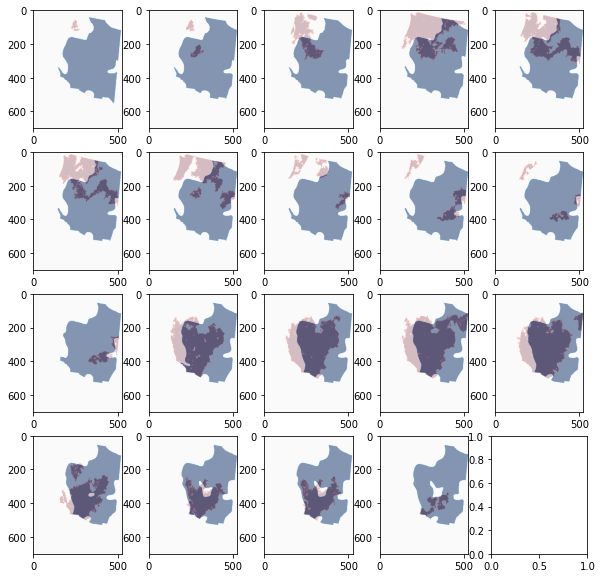

In [33]:
fig, axs = plt.subplots(4,5, figsize=(10,10))

for i, ax in enumerate(axs.ravel()):
    try:
        ax.imshow(spi30d_array[i, :, :], alpha=0.5, cmap=plt.cm.get_cmap('Reds'))
        ax.imshow(usdm_array[i, :, :], alpha=0.5, cmap=plt.cm.get_cmap('Blues'))
    except:
        pass

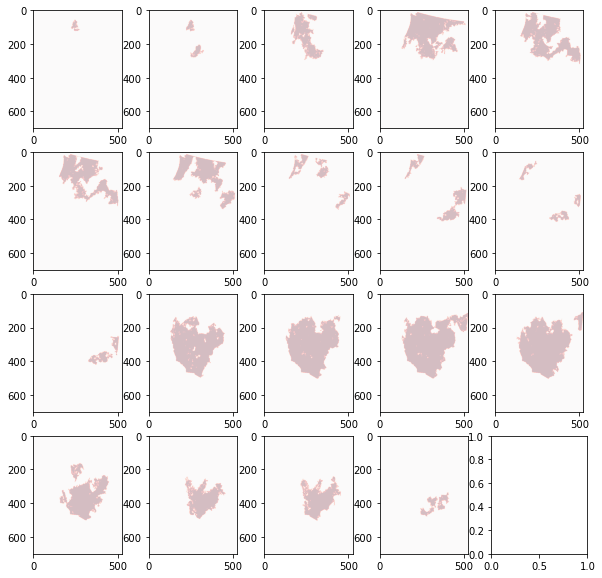

In [34]:
fig, axs = plt.subplots(4,5, figsize=(10,10))

for i, ax in enumerate(axs.ravel()):
    try:
        ax.imshow(spi30d_array[i, :, :], alpha=0.5, cmap=plt.cm.get_cmap('Reds'))
        ax.imshow(spi180d_array[i, :, :], alpha=0.5, cmap=plt.cm.get_cmap('Blues'))
    except:
        pass

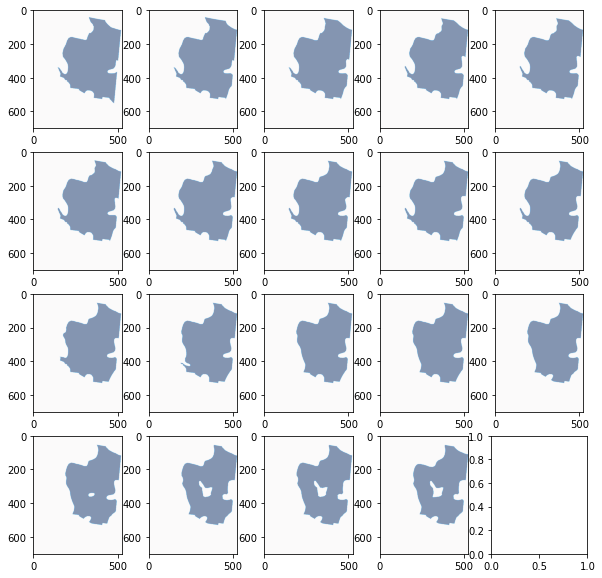

In [38]:
fig, axs = plt.subplots(4,5, figsize=(10,10))

for i, ax in enumerate(axs.ravel()):
    try:
        ax.imshow(spi180d_array[i, :, :], alpha=0.5, cmap=plt.cm.get_cmap('Reds'))
        ax.imshow(usdm_array[i, :, :], alpha=0.5, cmap=plt.cm.get_cmap('Blues'))
    except:
        pass

In [39]:
def aa_da_trace_plot(
        aa, da_1, da_2, path_1, path_2,
        aa_name, name_1, name_2,
        aa_color, color_1, color_2,
        grid_to_area, dates, ax=None
):
    
    aa_all = dict()
    for pairing in aa:
        aa_all.update(pairing)

    pre_sort_times = np.hstack([list(aa_all.keys())])
    times = np.sort(pre_sort_times)
    plot_dates = dates[times]

    aa_plot_vals = np.hstack([aa_all[time] for time in times])
    da_1_vals = []
    for time in times:
        try:
            da_1_vals.append(da_1[time]*grid_to_area)
        except:
            da_1_vals.append(0)
    da_2_vals = []
    for time in times:
        try:
            da_2_vals.append(da_2[time]*grid_to_area)
        except:
            da_2_vals.append(0)

    areas_1 = dict()
    for node in path_1:
        if not node.time in areas_1.keys():
            areas_1[node.time] = 0
        areas_1[node.time] += len(node.coords)*grid_to_area
    areas_2 = dict()
    for node in path_2:
        if not node.time in areas_2.keys():
            areas_2[node.time] = 0
        areas_2[node.time] += len(node.coords)*grid_to_area

    if ax is None:
        __, ax = plt.subplots()

    ax.plot(plot_dates, aa_plot_vals*grid_to_area, label=aa_name, color=aa_color, marker='.')
    ax.plot(plot_dates, da_1_vals, label=f'{name_1} DA', color=color_1, marker='.')
    ax.plot(plot_dates, da_2_vals, label=f'{name_2} DA', color=color_2, marker='.')

    ax.plot(
        plot_dates,
        np.hstack([areas_1[time] for time in times]), label=f'{name_1} Area', color=color_1, linestyle='--', marker='.'
    )
    ax.plot(
        plot_dates,
        np.hstack([areas_2[time] for time in times]), label=f'{name_2} Area', color=color_2, linestyle='--', marker='.'
    )

    ax.set_ylabel('Area (km2)')
    ax.set_xlabel('Date')

    return ax

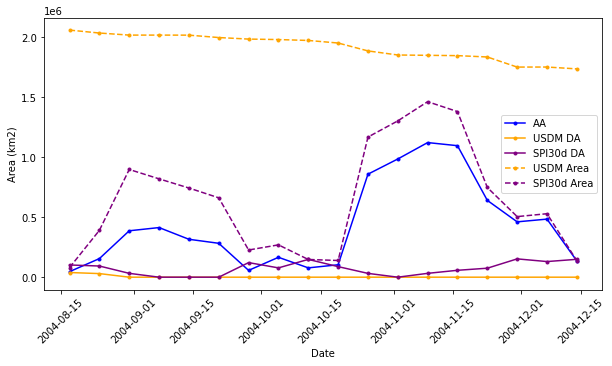

In [40]:
fig, ax = plt.subplots(figsize=(10,5))

ax = aa_da_trace_plot(
    aa_usdm_spi30d, da_usdm_spi30d, da_spi30d_usdm, 
    usdm_trace, spi30d_trace,
    'AA', 'USDM', 'SPI30d',
    'b', 'orange', 'purple',
    18.1, paired_ds['USDM Date'].values, ax
)
ax.legend()
ax.tick_params('x', rotation=45)
fig.set_facecolor('w')
#ax.set_yscale('symlog')

IndexError: arrays used as indices must be of integer (or boolean) type

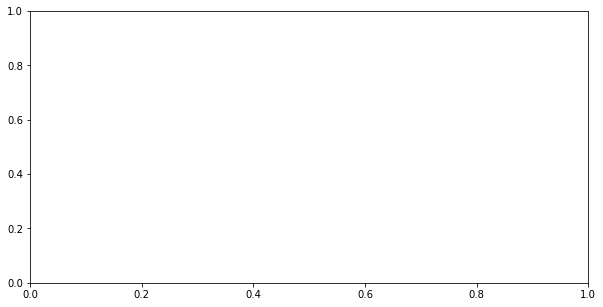

In [41]:
fig, ax = plt.subplots(figsize=(10,5))

ax = aa_da_trace_plot(
    aa_usdm_spi180d, da_usdm_spi180d, da_spi180d_usdm, 
    usdm_trace, spi180d_trace,
    'AA', 'USDM', 'SPI180d',
    'b', 'orange', 'cyan',
    18.1, paired_ds['USDM Date'].values, ax
)
ax.legend()
ax.tick_params('x', rotation=45)
fig.set_facecolor('w')
#ax.set_yscale('symlog')

IndexError: arrays used as indices must be of integer (or boolean) type

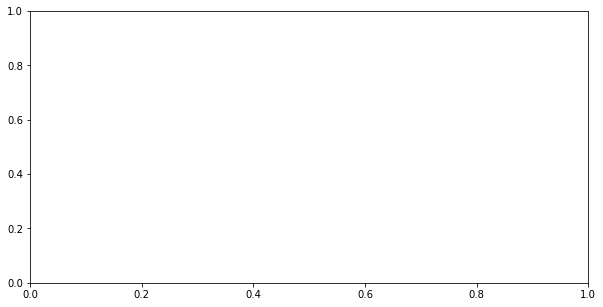

In [42]:
fig, ax = plt.subplots(figsize=(10,5))

ax = aa_da_trace_plot(
    aa_spi30d_spi180d, da_spi30d_spi180d, da_spi180d_spi30d, 
    spi30d_trace, spi180d_trace,
    'AA', 'SPI30d', 'SPI180d',
    'b', 'purple', 'cyan',
    18.1, paired_ds['USDM Date'].values, ax
)
ax.legend()
ax.tick_params('x', rotation=45)
fig.set_facecolor('w')
#ax.set_yscale('symlog')